In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import random
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LassoCV, RidgeCV, LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix, roc_curve, auc
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import operator
random.seed(123)

In [2]:
df = pd.read_csv("student-por.csv", delimiter=";")

In [3]:
df.shape

(649, 33)

In [4]:
sum(df['G3']!=0)

634

In [5]:
sum((df['G1'] != 0) & (df['G2'] != 0) & (df['G3'] != 0))

633

In [6]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


In [7]:
df = df[(df['G1'] != 0) & (df['G2'] != 0) & (df['G3'] != 0)]
targets = df.iloc[:, -3:]
df = df.iloc[:, :-3]
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences'],
      dtype='object')

One hot encode:
school, sex, address, famsize, pstatus, mjob, fjob, reason, guardian, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic

Column Name:school


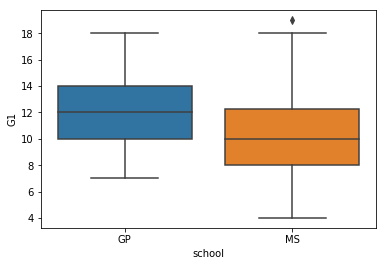

Column Name:sex


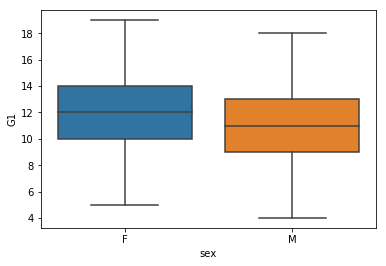

Column Name:age


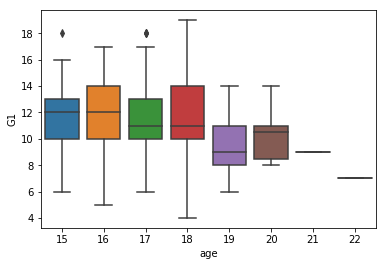

Column Name:address


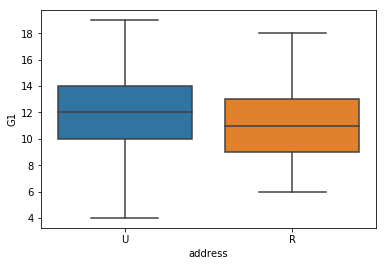

Column Name:famsize


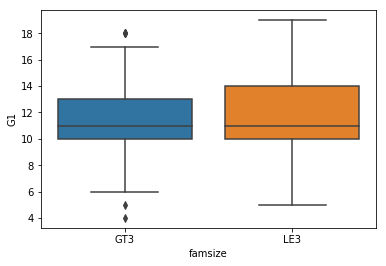

Column Name:Pstatus


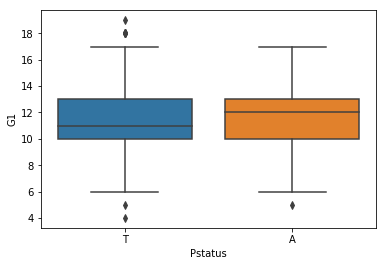

Column Name:Medu


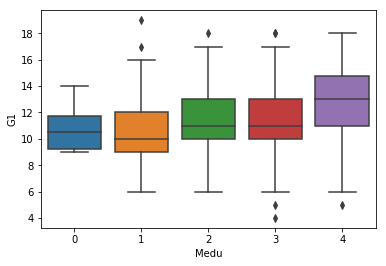

Column Name:Fedu


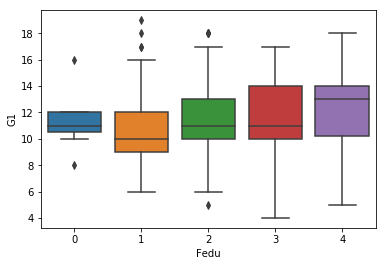

Column Name:Mjob


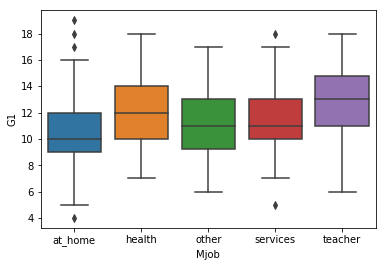

Column Name:Fjob


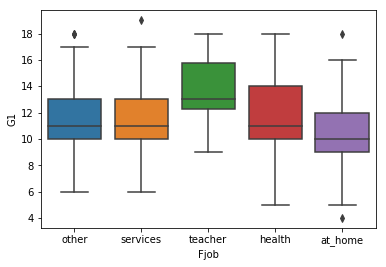

Column Name:reason


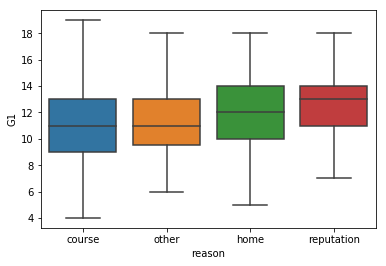

Column Name:guardian


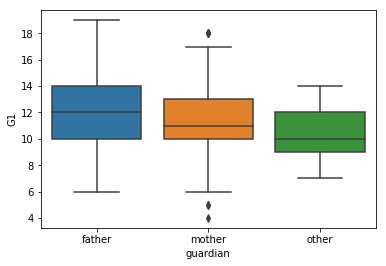

Column Name:traveltime


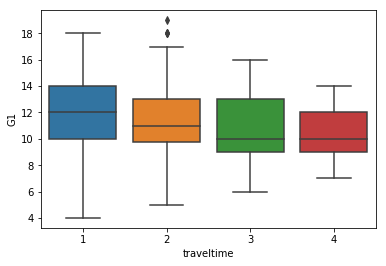

Column Name:studytime


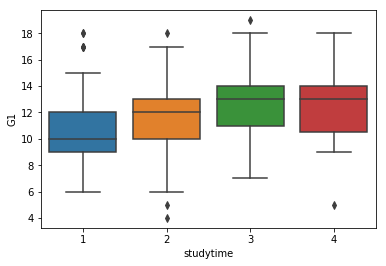

Column Name:failures


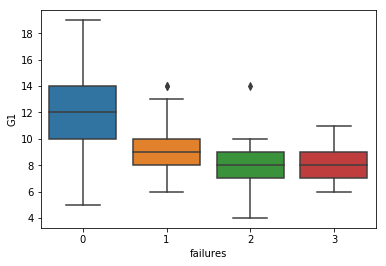

Column Name:schoolsup


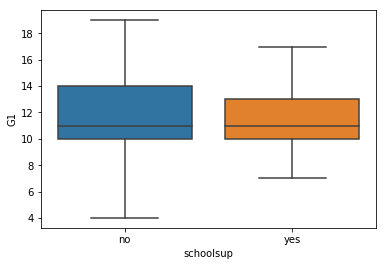

Column Name:famsup


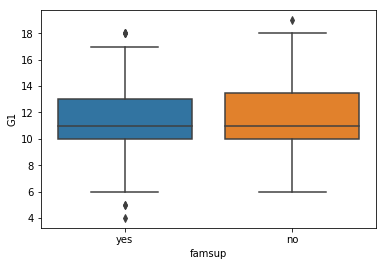

Column Name:paid


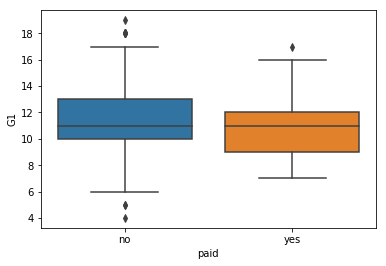

Column Name:activities


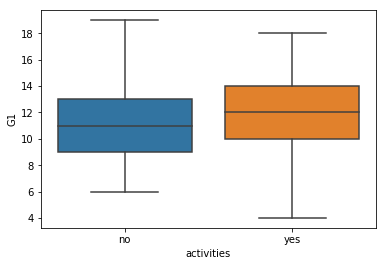

Column Name:nursery


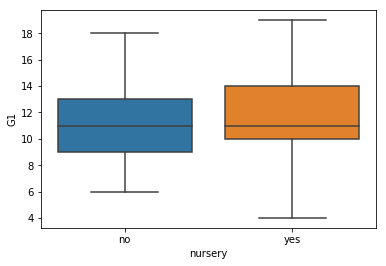

Column Name:higher


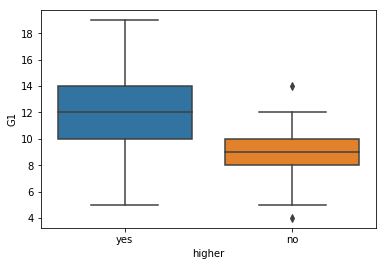

Column Name:internet


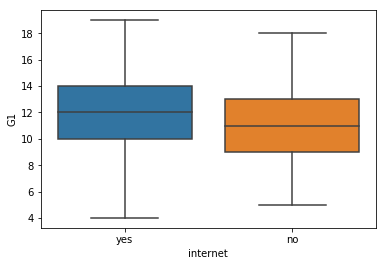

Column Name:romantic


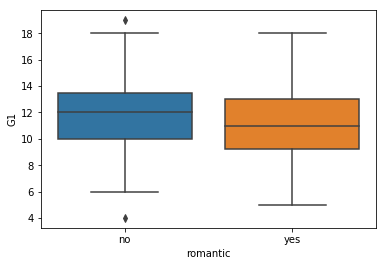

Column Name:famrel


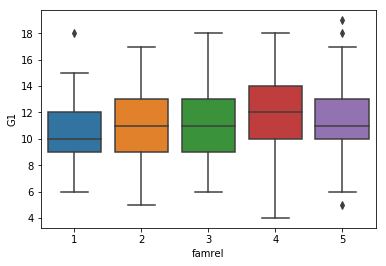

Column Name:freetime


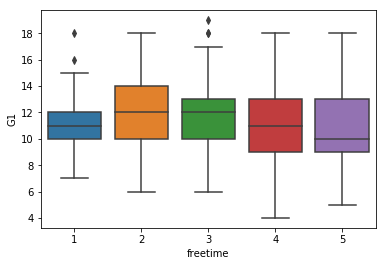

Column Name:goout


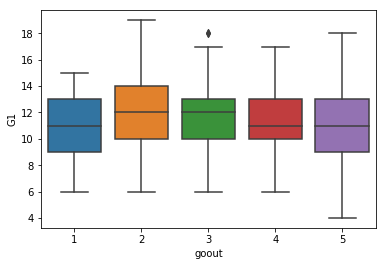

Column Name:Dalc


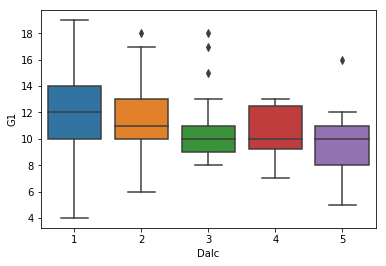

Column Name:Walc


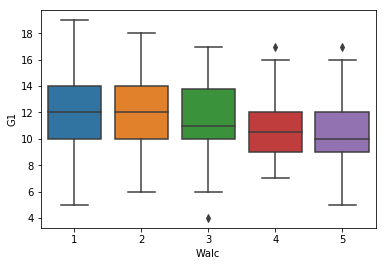

Column Name:health


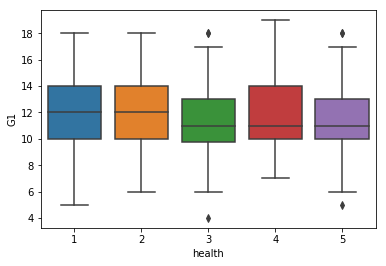

Column Name:absences


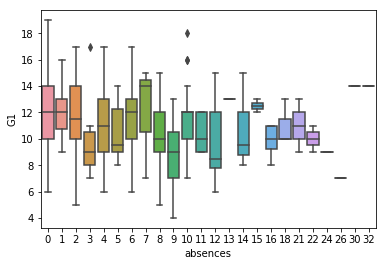

In [8]:
for cols in df.columns:
    print("Column Name:" + cols)
    sns.boxplot(x=df[cols], y=targets['G1'])
    plt.show()

In [9]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences'],
      dtype='object')

In [10]:
to_dummify = df[['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']]

In [11]:
to_keep = df.drop(columns=['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'])

In [12]:
to_keep

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
1,17,1,1,1,2,0,5,3,3,1,1,3,2
2,15,1,1,1,2,0,4,3,2,2,3,3,6
3,15,4,2,1,3,0,3,2,2,1,1,5,0
4,16,3,3,1,2,0,4,3,2,1,2,5,0
5,16,4,3,1,2,0,5,4,2,1,2,5,6
6,16,2,2,1,2,0,4,4,4,1,1,3,0
7,17,4,4,2,2,0,4,1,4,1,1,1,2
8,15,3,2,1,2,0,4,2,2,1,1,1,0
9,15,3,4,1,2,0,5,5,1,1,1,5,0
10,15,4,4,1,2,0,3,3,3,1,2,2,2


In [13]:
df_final = to_keep
for cols in to_dummify.columns:
    a = pd.get_dummies(to_dummify[cols], prefix = cols+'_')
    df_final = pd.concat([df_final, a], axis = 1)

In [14]:
df_final.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities__no,activities__yes,nursery__no,nursery__yes,higher__no,higher__yes,internet__no,internet__yes,romantic__no,romantic__yes
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0
5,16,4,3,1,2,0,5,4,2,1,...,0,1,0,1,0,1,0,1,1,0


In [15]:
train_x, test_x, train_y, test_y = train_test_split(df_final, targets['G3'], test_size=0.2, random_state = 42)
train_x.shape, test_x.shape

((506, 56), (127, 56))

In [77]:
def plotModel(model, train_x, train_y, astype=False):
    if astype:
        plt.plot(train_y, model.predict(train_x).astype(int), 'o', alpha=0.8)
    else:
        plt.plot(train_y, model.predict(train_x), 'o', alpha=0.8)
    plt.plot(train_y, train_y, 'red')
    plt.xlabel('Original Values')
    plt.ylabel('Model Predictions')
    plt.show()

### 1A. Linear Regression

R2 coefficient:
0.32837807183076095
MSE:
4.523756155524198


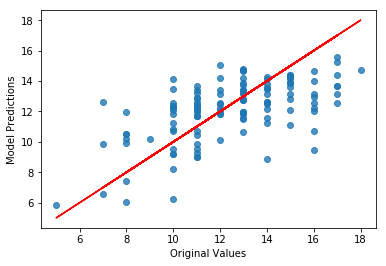

In [78]:
model = LinearRegression()
model.fit(train_x, train_y)
print('R2 coefficient:')
print(model.score(test_x, test_y))
print('MSE:')
print(mean_squared_error(test_y, model.predict(test_x)))
plotModel(model, test_x, test_y)

### 1B. Lasso Regression

R2 coefficient:
0.31610939379669417
MSE:
4.606392688741691


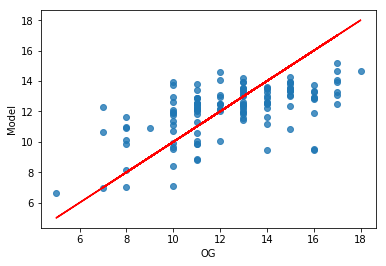

In [74]:
model = LassoCV(cv=5)
model.fit(train_x, train_y)
print('R2 coefficient:')
print(model.score(test_x, test_y))
print('MSE:')
print(mean_squared_error(test_y, model.predict(test_x)))
plotModel(model, test_x, test_y)

In [75]:
lasso_imp = dict(zip(df_final.columns,model.coef_))
print('Most important features:')
sorted(lasso_imp.items(), key=operator.itemgetter(1), reverse=True)

Most important features:


[('schoolsup__no', 0.7326821149970448),
 ('school__GP', 0.6077337728852151),
 ('studytime', 0.4046919945250659),
 ('age', 0.24426065951536646),
 ('Medu', 0.23142371339895088),
 ('reason__reputation', 0.21282883023348925),
 ('sex__F', 0.15603573240008248),
 ('Mjob__teacher', 0.08860235533655457),
 ('Fedu', 0.0831620397068245),
 ('famsup__no', 0.04748081289807902),
 ('Fjob__teacher', 0.03240489868055153),
 ('famrel', 0.017736834537448315),
 ('higher__yes', 6.422268106901455e-16),
 ('traveltime', 0.0),
 ('Walc', -0.0),
 ('sex__M', -0.0),
 ('address__R', -0.0),
 ('address__U', 0.0),
 ('famsize__LE3', 0.0),
 ('Pstatus__A', 0.0),
 ('Pstatus__T', -0.0),
 ('Mjob__at_home', -0.0),
 ('Mjob__health', -0.0),
 ('Mjob__other', -0.0),
 ('Mjob__services', 0.0),
 ('Fjob__at_home', 0.0),
 ('Fjob__health', -0.0),
 ('Fjob__other', 0.0),
 ('reason__home', 0.0),
 ('reason__other', -0.0),
 ('guardian__father', 0.0),
 ('guardian__mother', -0.0),
 ('guardian__other', -0.0),
 ('schoolsup__yes', -0.0),
 ('famsup

### 1.C Polynomial Regression

In [20]:
poly = PolynomialFeatures(2)
train_x_poly = poly.fit_transform(train_x)
test_x_poly = poly.fit_transform(test_x)

C:\Users\Siddhesh Acharekar\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Siddhesh Acharekar\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Siddhesh Acharekar\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Siddhesh Acharekar\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: 

C:\Users\Siddhesh Acharekar\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Siddhesh Acharekar\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Siddhesh Acharekar\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Siddhesh Acharekar\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: 

R2 coefficient:
0.3370793509641863
MSE:
4.46514808543324


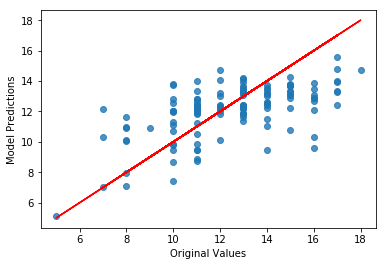

In [80]:
model = LassoCV(cv=5)
model.fit(train_x_poly, train_y)
print('R2 coefficient:')
print(model.score(test_x_poly, test_y))
print('MSE:')
print(mean_squared_error(test_y, model.predict(test_x_poly)))
plotModel(model, test_x_poly, test_y)

### 1.D Spline Regression: write

### 1.E RandomForest Regressor

R2 coefficient:
0.3618282410321273
MSE:
4.298450217047042


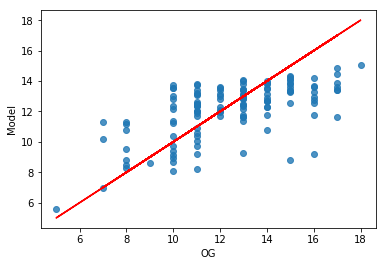

In [22]:
model = RandomForestRegressor(n_estimators = 100, max_depth = 7)
model.fit(train_x_poly, train_y)
print('R2 coefficient:')
print(model.score(test_x_poly, test_y))
print('MSE:')
print(mean_squared_error(test_y, model.predict(test_x_poly)))
plotModel(model, test_x_poly, test_y)

### 1.F Multilayer Perceptron Regressor

R2 coefficient:
0.18186896518804826
MSE:
5.510578421470692


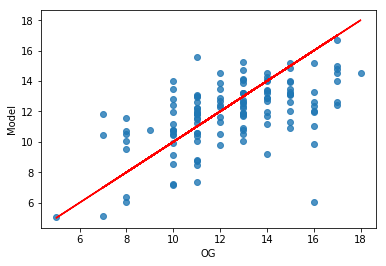

In [23]:
model = MLPRegressor(hidden_layer_sizes=(10,10), activation='relu', early_stopping=True)
model.fit(train_x_poly, train_y)
print('R2 coefficient:')
print(model.score(test_x_poly, test_y))
print('MSE:')
print(mean_squared_error(test_y, model.predict(test_x_poly)))
plotModel(model, test_x_poly, test_y)

#### Create the categorical y variables.
Threshold chosen at 14(explained in report).

In [24]:
train_y_binary = np.where(train_y >= 14, 1, 0)
test_y_binary = np.where(test_y >= 14, 1, 0)

In [43]:
def plot_roc_curve(fpr, tpr):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

### 2.A Logistic Regression

Mean Accuracy:
0.7244094488188977
Area under ROC curve: 0.6610076670317635


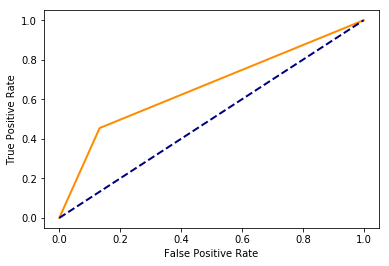

In [44]:
model = LogisticRegression()
model.fit(train_x, train_y_binary)
print('Mean Accuracy:')
print(model.score(test_x, test_y_binary))
# Compute ROC curve and ROC area

fpr, tpr, _ = roc_curve(test_y_binary, model.predict(test_x))
roc_auc = auc(fpr, tpr)
print('Area under ROC curve:', roc_auc)
plot_roc_curve(fpr, tpr)

### 2.B Gaussian NB

Mean Accuracy:
0.5118110236220472
Area under ROC curve: 0.6051478641840087


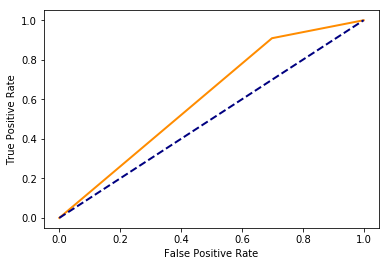

In [46]:
model = GaussianNB()
model.fit(train_x, train_y_binary)
print('Mean Accuracy:')
print(model.score(test_x, test_y_binary))
# Compute ROC curve and ROC area

fpr, tpr, _ = roc_curve(test_y_binary, model.predict(test_x))
roc_auc = auc(fpr, tpr)
print('Area under ROC curve:', roc_auc)
plot_roc_curve(fpr, tpr)

### 2.C Multinomial NB

Mean Accuracy:
0.6929133858267716
Area under ROC curve: 0.6903066812705366


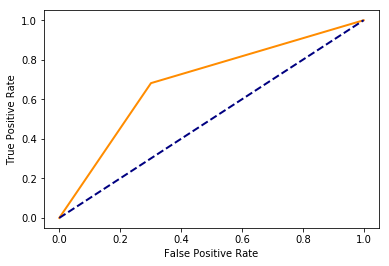

In [47]:
model = MultinomialNB()
model.fit(train_x, train_y_binary)
print('Mean Accuracy:')
print(model.score(test_x, test_y_binary))
# Compute ROC curve and ROC area

fpr, tpr, _ = roc_curve(test_y_binary, model.predict(test_x))
roc_auc = auc(fpr, tpr)
print('Area under ROC curve:', roc_auc)
plot_roc_curve(fpr, tpr)

### 2.D Bernoulli NB

Mean Accuracy:
0.7322834645669292
Area under ROC curve: 0.731106243154436


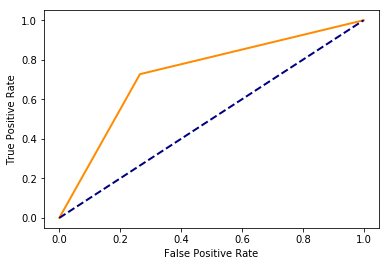

In [48]:
model = BernoulliNB()
model.fit(train_x, train_y_binary)
print('Mean Accuracy:')
print(model.score(test_x, test_y_binary))
# Compute ROC curve and ROC area

fpr, tpr, _ = roc_curve(test_y_binary, model.predict(test_x))
roc_auc = auc(fpr, tpr)
print('Area under ROC curve:', roc_auc)
plot_roc_curve(fpr, tpr)

### 2.E Random Forest

Mean Accuracy:
0.7401574803149606
Area under ROC curve: 0.6356790799561884


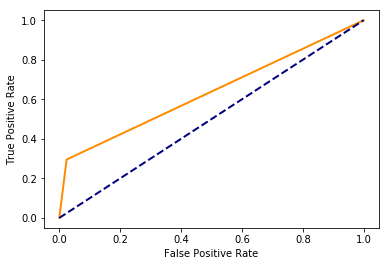

In [57]:
model = RandomForestClassifier(n_estimators = 100, max_depth = 7)
model.fit(train_x, train_y_binary)
print('Mean Accuracy:')
print(model.score(test_x, test_y_binary))
# Compute ROC curve and ROC area

fpr, tpr, _ = roc_curve(test_y_binary, model.predict(test_x))
roc_auc = auc(fpr, tpr)
print('Area under ROC curve:', roc_auc)
plot_roc_curve(fpr, tpr)

### 2.F MLP Classifier

Mean Accuracy:
0.3464566929133858
Area under ROC curve: 0.5


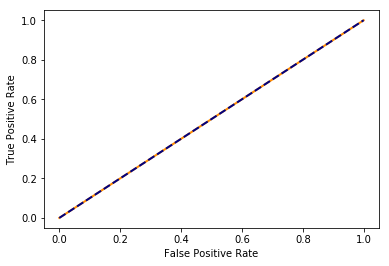

In [69]:
model = MLPClassifier(hidden_layer_sizes = (10, 10), activation='logistic', early_stopping=True)
model.fit(train_x, train_y_binary)
print('Mean Accuracy:')
print(model.score(test_x, test_y_binary))
# Compute ROC curve and ROC area

fpr, tpr, _ = roc_curve(test_y_binary, model.predict(test_x))
roc_auc = auc(fpr, tpr)
print('Area under ROC curve:', roc_auc)
plot_roc_curve(fpr, tpr)

### 2.G LDA

Mean Accuracy:
0.7007874015748031
Area under ROC curve: 0.6269167579408542


C:\Users\Siddhesh Acharekar\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


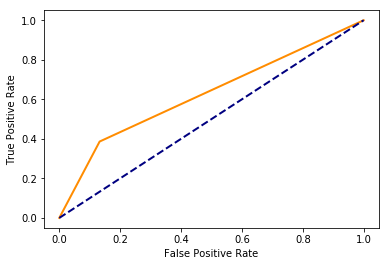

In [71]:
model = LinearDiscriminantAnalysis()
model.fit(train_x, train_y_binary)
print('Mean Accuracy:')
print(model.score(test_x, test_y_binary))
# Compute ROC curve and ROC area

fpr, tpr, _ = roc_curve(test_y_binary, model.predict(test_x))
roc_auc = auc(fpr, tpr)
print('Area under ROC curve:', roc_auc)
plot_roc_curve(fpr, tpr)

In [ ]:
filter_col = [col for col in train_x if col.startswith('school_') or col.startswith('failures')]
model = LinearRegression()
model.fit(train_x[filter_col], train_y)
model.score(val_x[filter_col], val_y)

In [ ]:
poly = PolynomialFeatures(2)
A = poly.fit_transform(train_x)
B = poly.transform(val_x)
model = LassoCV(cv=5, max_iter=10000)
model.fit(A, train_y)
model.score(B, val_y)
plotModel(model, A, train_y)

In [ ]:
model = RandomForestRegressor(max_depth=3,n_estimators=100)
model.fit(train_x, train_y)
mean_squared_error(model.predict(val_x), val_y), model.score(val_x, val_y) 

In [ ]:
poly = PolynomialFeatures(2)
A = poly.fit_transform(train_x)
B = poly.transform(val_x)
model = RandomForestRegressor(max_depth=7,n_estimators=300)
model.fit(A, train_y)
mean_squared_error(model.predict(B), val_y), model.score(B, val_y) 

In [ ]:
model = SVR(C=1.0, epsilon=0.2)
model.fit(A, train_y)
model.score(B, val_y) 

In [ ]:
model = MLPRegressor(hidden_layer_sizes=(18,20), activation='identity', early_stopping=True)
model.fit(A,train_y)
model.score(B, val_y) 

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(45,45,45), activation='logistic', max_iter=100, learning_rate='adaptive')
model.fit(train_x[filter_col],train_y)
model.score(val_x[filter_col], val_y) 

In [ ]:
abs(df.corr()).sort_values('G1')

In [ ]:
model = RandomForestClassifier(max_depth=7,n_estimators=100)
model.fit(train_x, train_y)
model.score(val_x, val_y) 

In [ ]:
np.unique(Y, return_counts=True)

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(30,30), activation='relu', max_iter=10000)
model.fit(train_x,train_y)
model.score(val_x, val_y) 

In [ ]:
poly = PolynomialFeatures(2)
A = poly.fit_transform(train_x)
B = poly.transform(val_x)
model = RandomForestClassifier(max_depth=7,n_estimators=100, random_state=76)
model.fit(A,train_y)
model.score(B, val_y), model.score(A,train_y)